# Discovering Geo-Referenced (Spatial) Partial Periodic patterns in Big Data Using STECLAT Algorithm

In this tutorial, we will discuss the first approach to find Geo-Referenced Partial Periodic patterns in big data using STECLAT algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Geo-Referenced Partial Periodic patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing STECLAT on a single dataset at a particular minimum periodic support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the STECLAT algorithm

In [1]:
from PAMI.partialPeriodicSpatialPattern.basic import STEclat  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
neighborFile = 't10_neighbours.txt'
minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 40000
seperator = '\t'       

#### Step 3: Execute the STECLAT algorithm

In [3]:
obj = alg.STEclat(iFile=inputFile, minPS=minimumSupportCount,maxIAT=maxmunPeriodCount, nFile=neighborFile,sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='spatialPeriodicPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 797


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 1.404829740524292


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 222351360
Memory (USS): 183980032


# Advanced Tutorial on Implementing STECLAT Algorithm

In this tutorial, we will discuss the second approach to find Spatial Partial Periodic patterns in big data using STECLAT algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Spatial Partial Periodic patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Partial Periodic Spatial Pattern Growth(STECLAT) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the STECLAT algorithm and pandas data frame

In [1]:
from PAMI.partialPeriodicSpatialPattern.basic import STEclat as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
maximumPeriodCount = 30000
minimumSupportCountList = [50, 60, 70, 80, 90, 100]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='t10_neighbours.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFS_ECLAT algorithm

#### Step 3: Execute the GPFPMiner algorithm using a for loop

In [3]:
algorithm = 'STECLAT'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.STEclat(inputFile, minPS=minSupCount,maxIAT=maximumPeriodCount,nFile=neighborFile, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maximumPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


#### Step 4: Print the result

In [4]:
print(result)

  algorithm  minSup  maxPer  patterns   runtime     memory
0   STECLAT      50   30000       839  1.324565  223055872
1   STECLAT      60   30000       830  1.319261  223870976
2   STECLAT      70   30000       822  1.385702  224296960
3   STECLAT      80   30000       813  1.364136  224382976
4   STECLAT      90   30000       807  1.491343  224399360
5   STECLAT     100   30000       797  1.419304  224473088


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

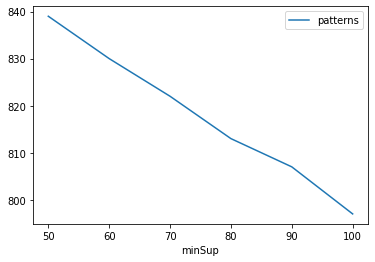

Graph for No Of Patterns is successfully generated!


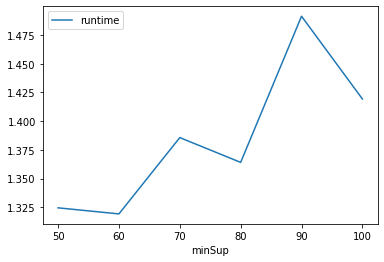

Graph for Runtime taken is successfully generated!


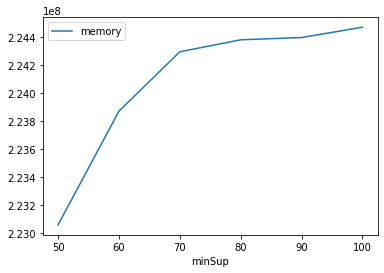

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
